# Cleaning up Offence Data

In [1]:
import pandas as pd
import numpy as np

offense = pd.read_csv("/Users/clarissaache/Documents/Capstone/JUSTFAIR_capstone copy 2/00_raw_data/2013_2022_cr_offenses.csv")

# (1) Subset columns
offense = offense[
    [
        "case_id",
        "CRRKEY",
        "CROCDT",
        "CROFFC",
        "CRODTA",
        "CROFFV",
        "CROCCT",
        "CRDPLE",
        "CRDVER",
        "CRDMOD",
        "CRDDDT",
        "CRDJNO",
        "CRDMNL",
        "CRDMXL",
        "CRDSPD",
        "CRDFIN",
        "CRDRES",
        "CRDPRL",
        "CRDPPD",
        "CRDSUL",
        "CRDSUP",
        "CRDPRS",
        "CRDSDT",
        "CRDJDS",
        "CROMCK",
        "CRDSPT",
        "CRDPBF",
        "CRDCDMVL",
        "CRDACTSN",
        "CRDCSHR",
        "CRDOFCL",
        "CRDPRPT",
        "CRDCFJF",
        "CRDCFJO",
        "CRDCST",
    ]
]

# (2) rename
offense = offense.rename(
    columns={
        "CROCDT": "charged_offense_date",
        "CROFFC": "charged_offense_code",
        "CRODTA": "arraigned_offense_date",
        "CROFFV": "convicted_offense_code",
        "CROCCT": "offense_court_type",
        "CRDPLE": "plea_code",
        "CRDVER": "verdict_code",
        "CRDMOD": "disposition",
        "CRDDDT": "disposition_date",
        "CRDJNO": "judge_code",
        "CRDMNL": "min_sentence",
        "CRDMXL": "max_sentence",
        "CRDSPD": "min_sentence_frame",
        "CRDFIN": "fines",
        "CRDRES": "restitution",
        "CRDPRL": "probation_len",
        "CRDPPD": "probation_frame",
        "CRDSUL": "suspension_len",
        "CRDSUP": "suspension_frame",
        "CRDPRS": "supervised_probation_flag",
        "CRDSDT": "date to paid",
        "CRDJDS": "monies_paid_flag",
        "CROMCK": "more_offense_check_flag",
        "CRDSPT": "max_sentence_frame",
        "CRDPBF": "plea_bargain_flag",
        "CRDCDMVL": "domestic_violence_flag",
        "CRDACTSN": "active_sentence_ind",
        "CRDCSHR": "community_service_hr",
        "CRDOFCL": "offense_class",
        "CRDPRPT": "prior_record_points",
        "CRDCFJF": "judgement_file_number",
        "CRDCFJO": "judgement_file_offense_num",
        "CRDCST": "court_cost",
    }
)

/Users/clarissaache/opt/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7,9,17,18,21,22,23,24,25,27,28,29,30,31,32,34,35,36,37,38,39,40,41,42,44,45,47,52,54,55,56,58,67,68,69,71,72) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
# (3)standardize sentencing unit to DAY

offense['min_sentence_day'] = offense['min_sentence']
offense['max_sentence_day'] = offense['max_sentence']
offense.loc[offense['min_sentence_frame']=='M','min_sentence_day'] = offense.loc[offense['min_sentence_frame']=='M','min_sentence']*30
offense.loc[offense['min_sentence_frame']=='Y','min_sentence_day'] = offense.loc[offense['min_sentence_frame']=='Y','min_sentence']*365
offense.loc[offense['max_sentence_frame']=='M','max_sentence_day'] = offense.loc[offense['max_sentence_frame']=='M','max_sentence']*30
offense.loc[offense['max_sentence_frame']=='Y','max_sentence_day'] = offense.loc[offense['max_sentence_frame']=='Y','max_sentence']*365

In [3]:
# (4) Check missing values:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table


missing_zero_values_table(offense)

Your selected dataframe has 37 columns and 23039404 Rows.
There are 34 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
offense_court_type,0,23036631,100.0,23036631,100.0,object
plea_bargain_flag,0,23036540,100.0,23036540,100.0,object
suspension_frame,0,23034448,100.0,23034448,100.0,object
suspension_len,1,23034443,100.0,23034444,100.0,object
community_service_hr,0,22816330,99.0,22816330,99.0,float64
restitution,60284,22734707,98.7,22794991,98.9,float64
max_sentence_frame,0,22442406,97.4,22442406,97.4,object
max_sentence,11,22442397,97.4,22442408,97.4,float64
max_sentence_day,11,22442397,97.4,22442408,97.4,float64
judgement_file_number,0,22416338,97.3,22416338,97.3,float64


Your selected dataframe has 33 columns and 23039404 Rows.
There are 30 columns that have missing values.


<AxesSubplot:title={'center':'Patterns in how offense information is missing the NC Courts (ACIS) Dataset may explain certain qualities about some types of cases'}, xlabel='Selected Offense Features for Analysis in the NC Court (ACIS) dataset', ylabel='% Of Missing (Red) and Not Missing (Green) Values'>

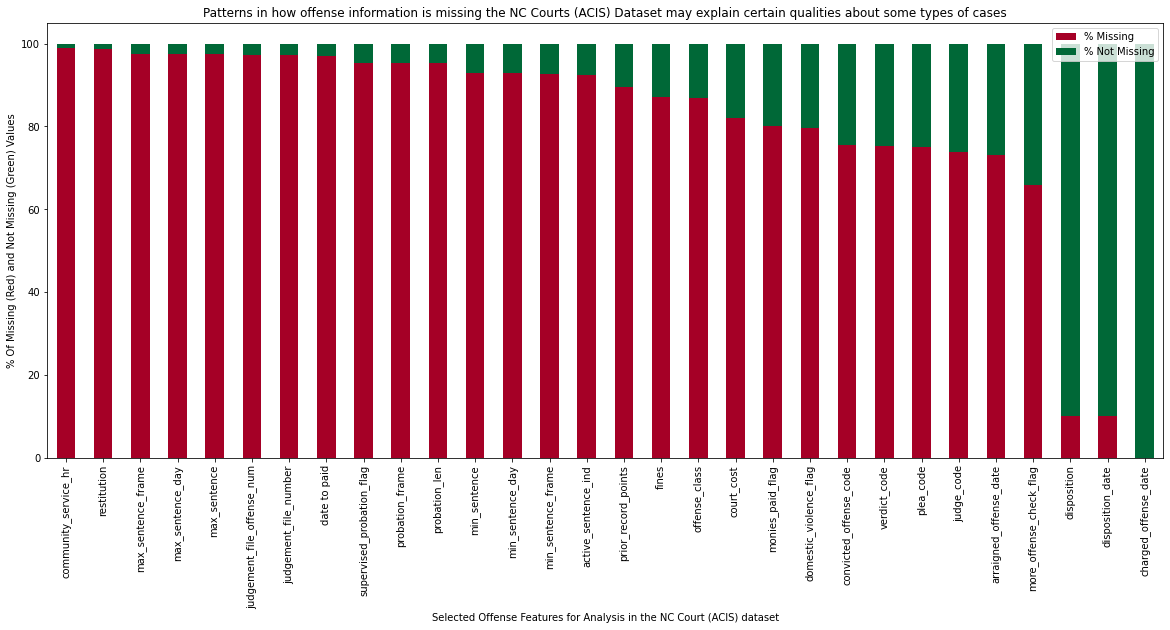

In [7]:
missing_data= missing_zero_values_table(offense)
missing_data['% Not Missing']=100 - missing_data['% of Total Values']
missing_data.rename(columns={"% of Total Values": "% Missing"}, inplace=True)

missing_data[['% Missing','% Not Missing']].plot(
    kind="bar",
    figsize=(20, 8),
    xlabel="Selected Offense Features for Analysis in the NC Court (ACIS) dataset",
    ylabel="% Of Missing (Red) and Not Missing (Green) Values",
    title="Missing Offense Information",
    legend=True,
    stacked=True,
    colormap='RdYlGn',
)

<AxesSubplot:title={'center':'Missing Offense Information'}, xlabel='Selected Offense Features for Analysis in the NC Court (ACIS) dataset', ylabel='% Of Missing (Red) and Not Missing (Green) Values'>

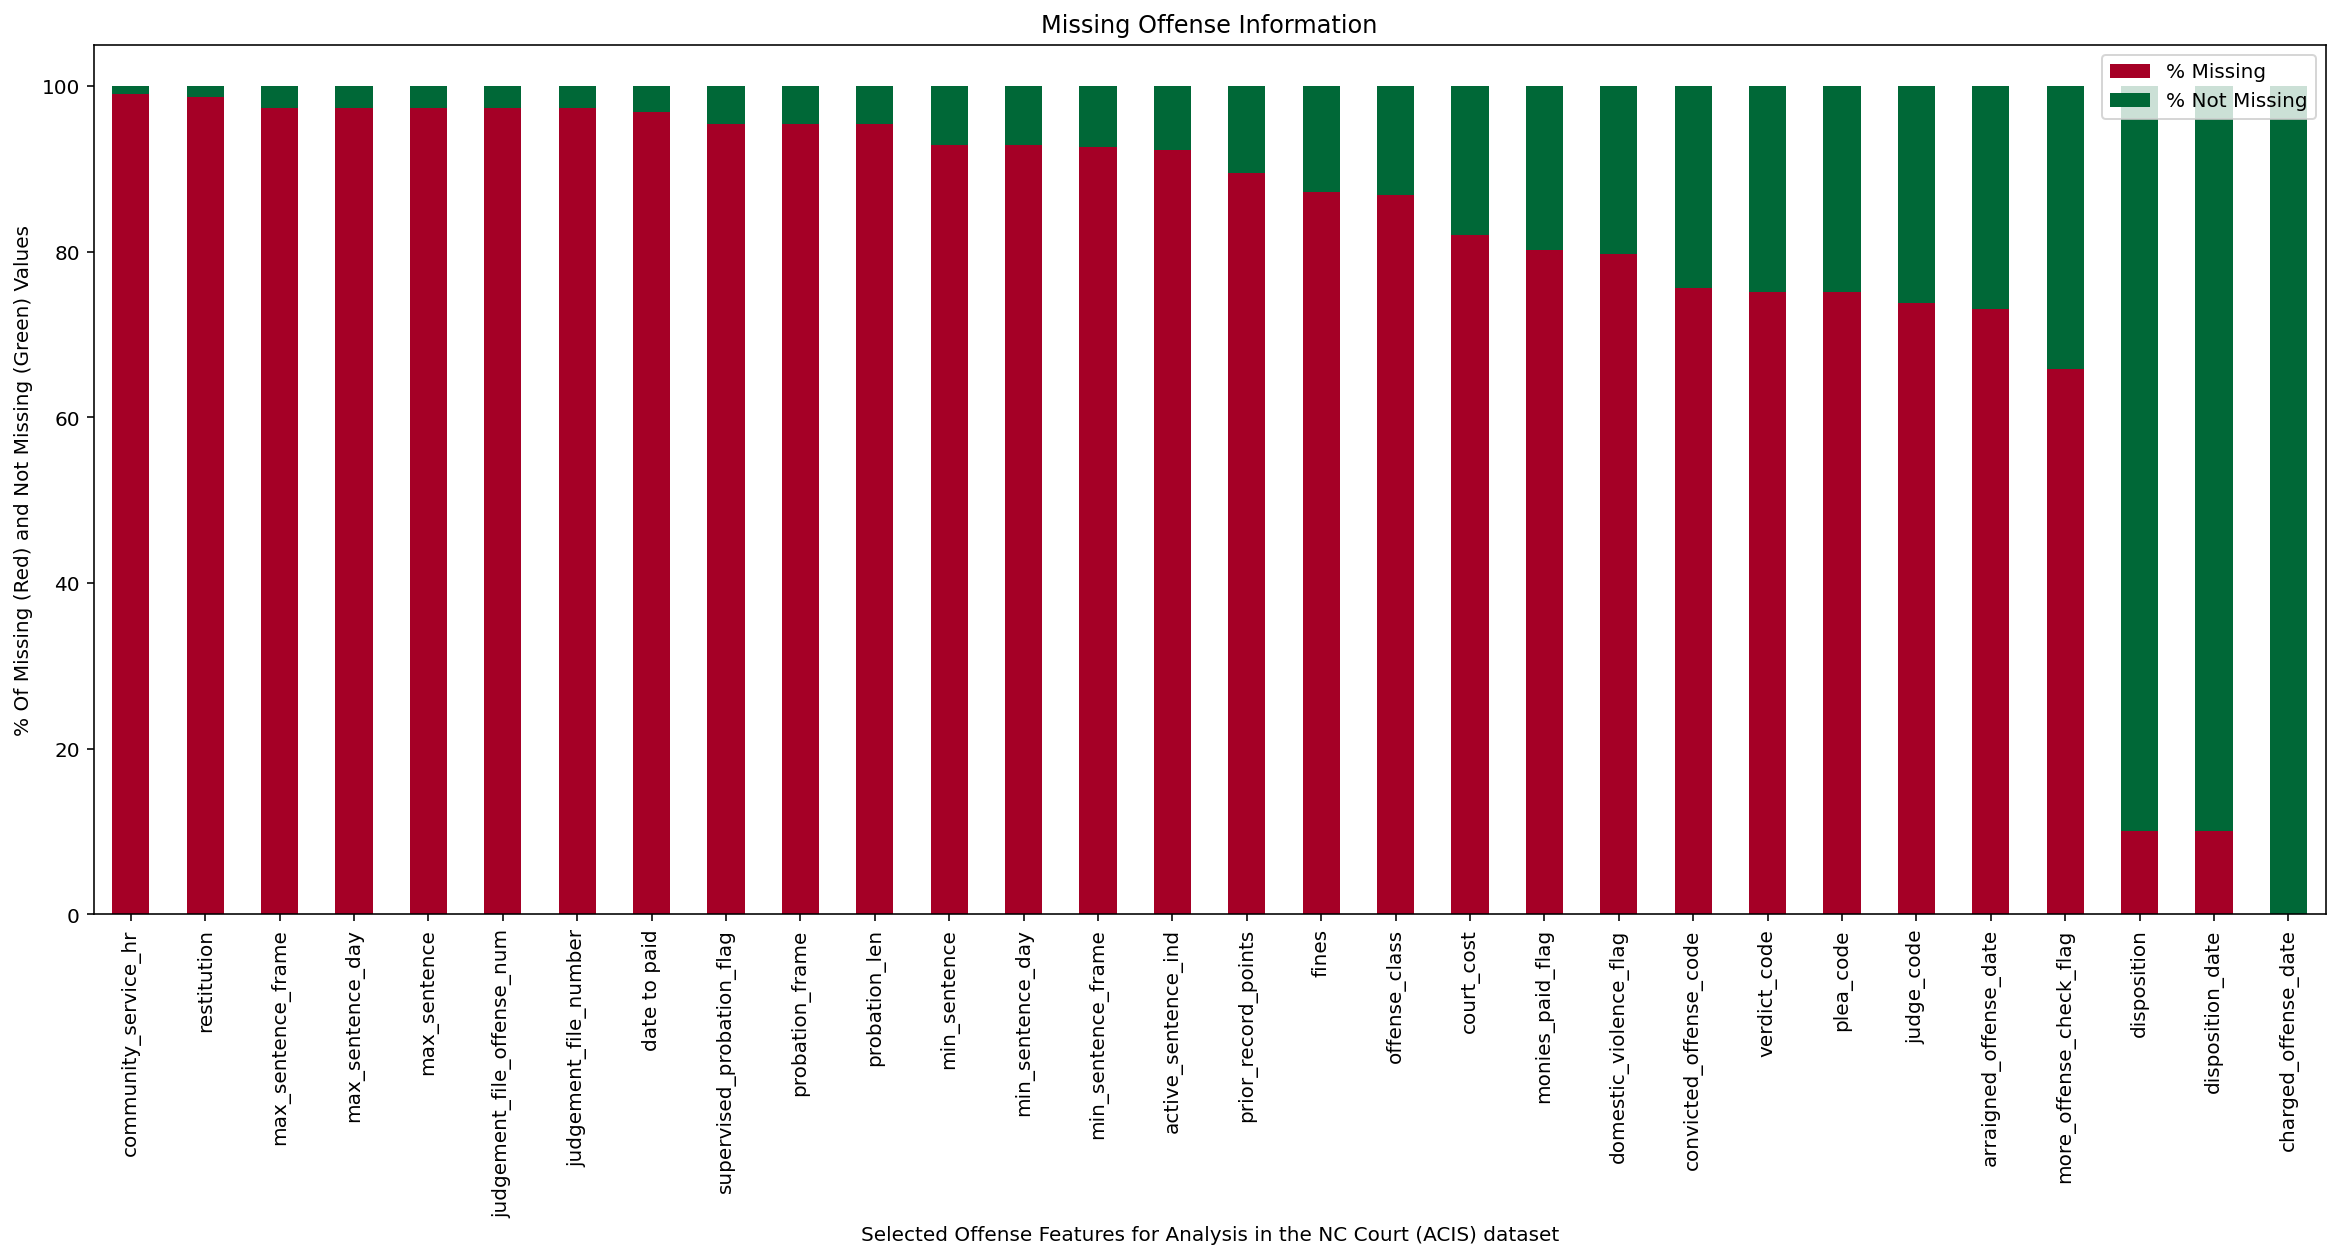

In [9]:
%config InlineBackend.figure_format = 'retina'
missing_data[['% Missing','% Not Missing']].plot(
    kind="bar",
    figsize=(20, 8),
    xlabel="Selected Offense Features for Analysis in the NC Court (ACIS) dataset",
    ylabel="% Of Missing (Red) and Not Missing (Green) Values",
    title="Missing Offense Information",
    legend=True,
    stacked=True,
    colormap='RdYlGn',
)

In [4]:
# lets get rid of columns that are 100% missing:
offense.drop(['offense_court_type','plea_bargain_flag','suspension_frame','suspension_len'],axis=1,inplace=True)

In [5]:
# (5) output to csv
offense.to_csv("/Users/clarissaache/Documents/Capstone/JUSTFAIR_capstone/10_clean_data/offenses_v01.csv")